In [5]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# For nicer plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)


In [6]:
# Load your Netflix dataset
df = pd.read_csv("Netflix_Dataset.csv")

# Preview
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


(7789, 11)

In [8]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Fill missing text fields
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Not Rated')

# Drop duplicates if any
df.drop_duplicates(inplace=True)

print("✅ Data cleaned successfully!")
df.info()


✅ Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      7787 non-null   object        
 4   Cast          7787 non-null   object        
 5   Country       7787 non-null   object        
 6   Release_Date  7689 non-null   datetime64[ns]
 7   Rating        7787 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 730.0+ KB


In [10]:
# 1. Movies vs TV Shows
category_counts = df['Category'].value_counts()
print("\n Movies vs TV Shows:")
print(category_counts)


 Movies vs TV Shows:
Category
Movie      5377
TV Show    2410
Name: count, dtype: int64


In [11]:
# 2. Top 5 countries
top_countries = df['Country'].value_counts().head(5)
print("\n🌍 Top 5 Countries with Most Titles:")
print(top_countries)


🌍 Top 5 Countries with Most Titles:
Country
United States     2555
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64


In [12]:
# 4. Average movie duration
df['Duration_num'] = df['Duration'].str.extract('(\\d+)').astype(float)
avg_duration = df[df['Category']=="Movie"]['Duration_num'].mean()
print(f"\n⏱️ Average Movie Duration: {round(avg_duration, 1)} minutes")


⏱️ Average Movie Duration: 99.3 minutes


In [13]:
# 5. Most popular genre/type
print("\n🎭 Most Common Type/Genre:")
print(df['Type'].value_counts().head(5))


🎭 Most Common Type/Genre:
Type
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Name: count, dtype: int64


In [14]:
# 7. Range of release years
min_year = int(df['Release_Date'].dt.year.min())
max_year = int(df['Release_Date'].dt.year.max())
print(f"\n📅 Content Range: {min_year} → {max_year}")


📅 Content Range: 2008 → 2021


C:\Users\rks25\AppData\Local\Temp\ipykernel_11496\3149986481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='viridis')


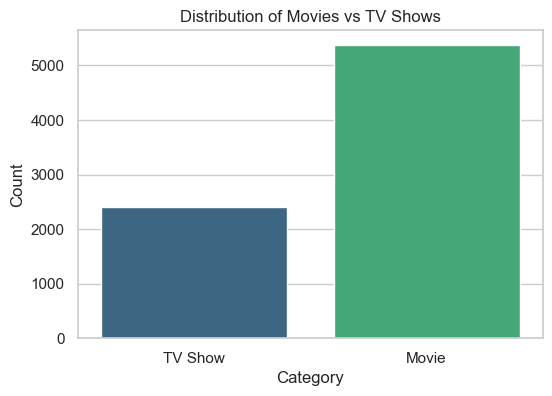

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


C:\Users\rks25\AppData\Local\Temp\ipykernel_11496\3561788683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


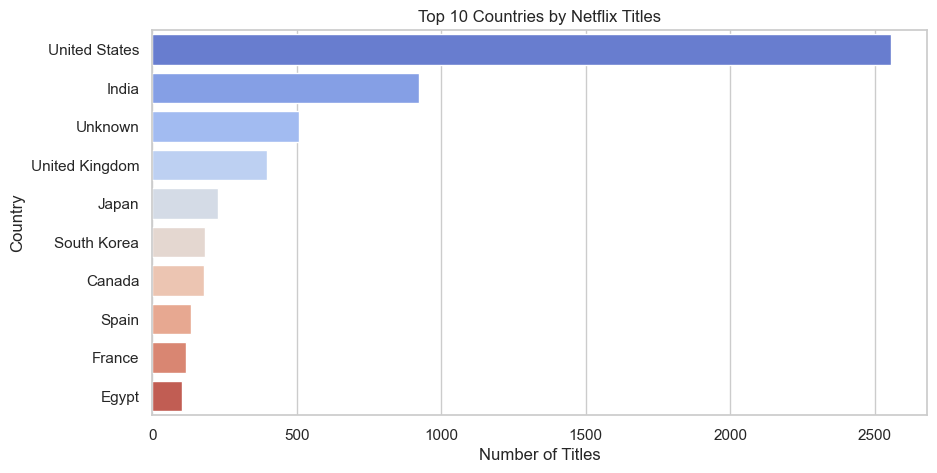

In [16]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


C:\Users\rks25\AppData\Local\Temp\ipykernel_11496\919123483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Rating'], order=df['Rating'].value_counts().index, palette='magma')


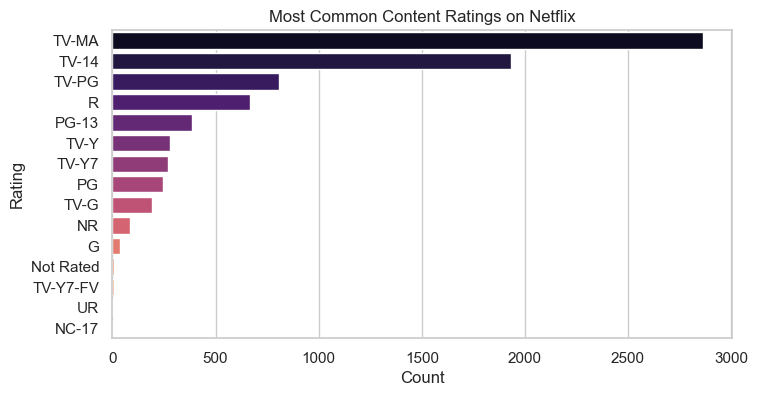

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['Rating'], order=df['Rating'].value_counts().index, palette='magma')
plt.title('Most Common Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


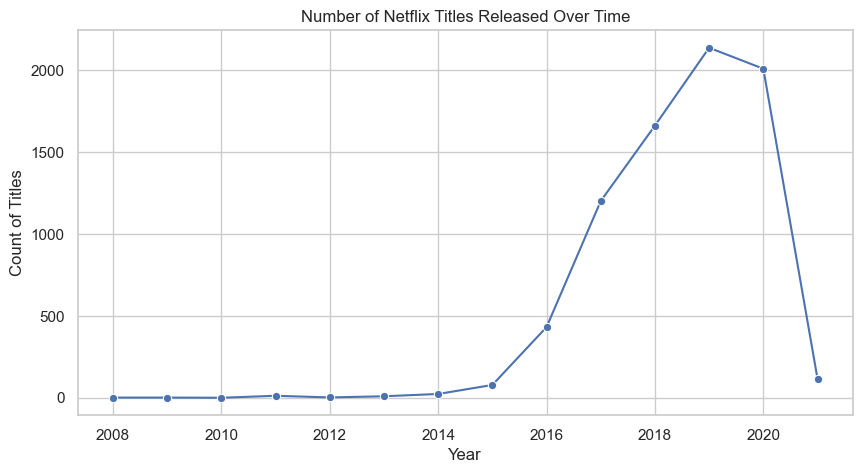

In [18]:
df['Year'] = df['Release_Date'].dt.year

yearly_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title('Number of Netflix Titles Released Over Time')
plt.xlabel('Year')
plt.ylabel('Count of Titles')
plt.show()


C:\Users\rks25\AppData\Local\Temp\ipykernel_11496\4229121133.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='plasma')


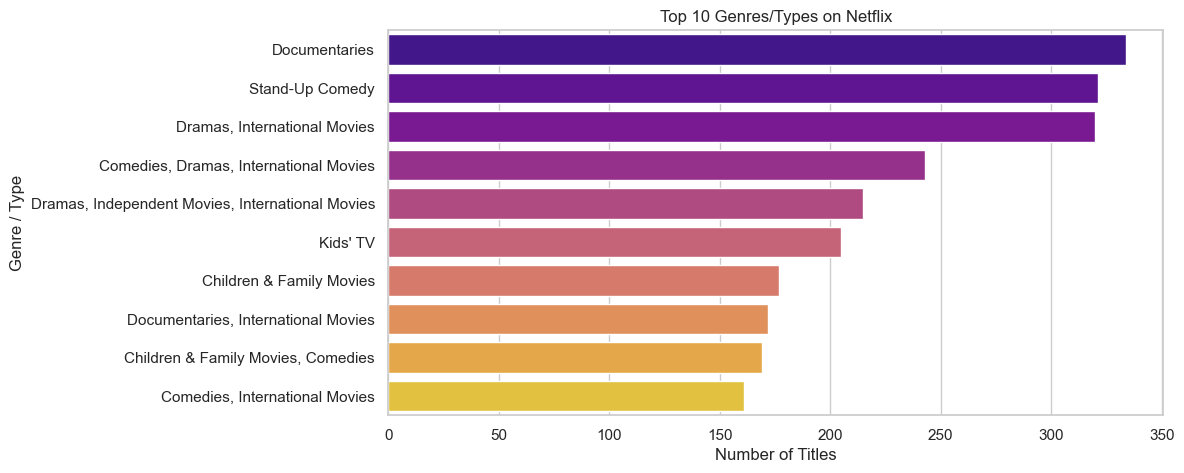

In [19]:
plt.figure(figsize=(10,5))
top_genres = df['Type'].value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, palette='plasma')
plt.title('Top 10 Genres/Types on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre / Type')
plt.show()


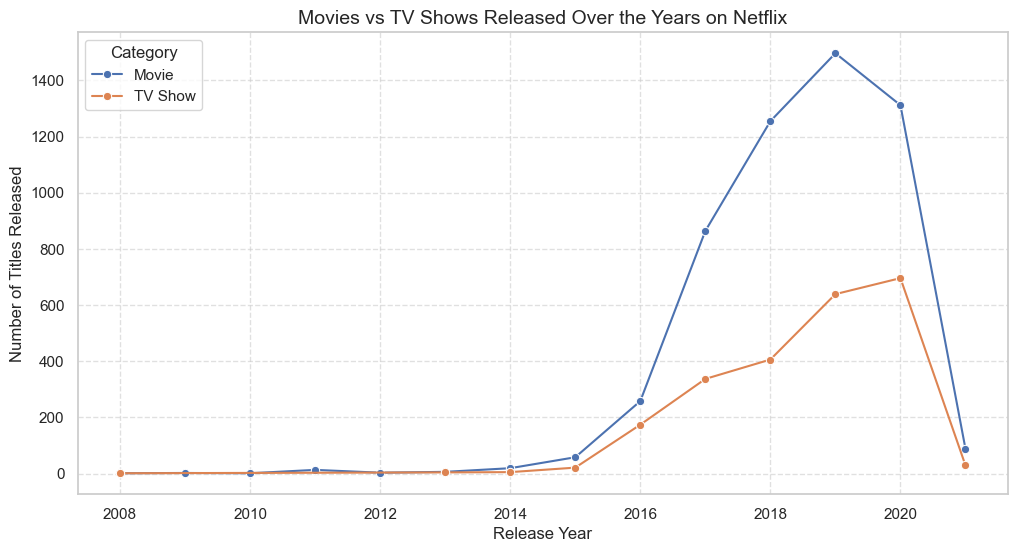

In [20]:
# Make sure year column exists
df['Year'] = df['Release_Date'].dt.year

# Group by Year and Category
year_category = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=year_category, x='Year', y='Count', hue='Category', marker='o')

plt.title('Movies vs TV Shows Released Over the Years on Netflix', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.legend(title='Category')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\rks25\AppData\Local\Temp\ipykernel_11496\2412182545.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_genres.values, y=top5_genres.index, palette='magma')


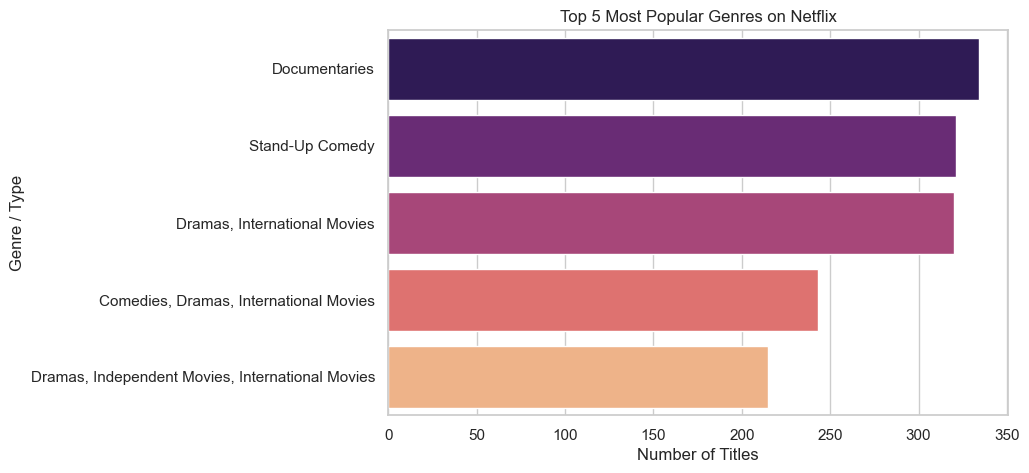

In [21]:
plt.figure(figsize=(8,5))
top5_genres = df['Type'].value_counts().head(5)

sns.barplot(x=top5_genres.values, y=top5_genres.index, palette='magma')
plt.title('Top 5 Most Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre / Type')
plt.show()
